**Importing Libraries**


In [41]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
# Suppressing the  warnings
warnings.filterwarnings("ignore")


**Importing Data Sets**

In [42]:

Pizza_ingredients = pd.read_csv("Pizza_ingredients - Pizza_ingredients.csv")
Pizza_Sale = pd.read_csv("Pizza_Sale - pizza_sales.csv")

**Understanding the Data**

In [43]:
Pizza_ingredients.isnull().sum()

pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    4
dtype: int64

In [44]:
Pizza_ingredients.dtypes

pizza_name_id          object
pizza_name             object
pizza_ingredients      object
Items_Qty_In_Grams    float64
dtype: object

In [45]:
Pizza_Sale.isnull().sum()

pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64

In [46]:
Pizza_Sale.dtypes

pizza_id               int64
order_id               int64
pizza_name_id         object
quantity               int64
order_date            object
order_time            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object

In [47]:
def parse_date(date_str):
    for fmt in ('%Y-%m-%d', '%d-%m-%Y'):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT  # Return Not a Time if parsing fails
Pizza_Sale['order_date'] = Pizza_Sale['order_date'].apply(parse_date)
Pizza_Sale['order_date'] = Pizza_Sale['order_date'].dt.strftime('%m/%d/%Y')
Pizza_Sale['order_date'] = pd.to_datetime(Pizza_Sale['order_date'])

In [48]:
Pizza_Sale.dtypes

pizza_id                      int64
order_id                      int64
pizza_name_id                object
quantity                      int64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dtype: object

In [49]:
Pizza_Sale.dropna(inplace=True)
Pizza_ingredients.dropna(inplace=True)

In [50]:
Pizza_Sale.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
1650,1651,737,bbq_ckn_m,1,2015-01-13,11:31:34,16.75,16.75,M,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza
1651,1652,737,thai_ckn_m,1,2015-01-13,11:31:34,16.75,16.75,M,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza
1652,1653,738,southw_ckn_m,1,2015-01-13,12:16:47,16.75,16.75,M,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja...",The Southwest Chicken Pizza
1653,1654,739,big_meat_s,1,2015-01-13,12:19:38,12.00,12.00,S,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",The Big Meat Pizza
1654,1655,740,cali_ckn_m,1,2015-01-13,12:29:51,16.75,16.75,M,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",The California Chicken Pizza


In [51]:
Pizza_Sale.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [52]:
Pizza_ingredients.head()

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0


In [53]:
sales_df = Pizza_Sale
ingredients_df = Pizza_ingredients

merged_df = pd.merge(sales_df[['pizza_id', 'order_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_name']], ingredients_df, how='left', on='pizza_name')

In [54]:
merged_df

,pizza_id,order_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_name,pizza_name_id,pizza_ingredients,Items_Qty_In_Grams
0,1651,737,1,2015-01-13,11:31:34,16.75,16.75,M,Chicken,The Barbecue Chicken Pizza,bbq_ckn_l,Barbecued Chicken,40.0
1,1651,737,1,2015-01-13,11:31:34,16.75,16.75,M,Chicken,The Barbecue Chicken Pizza,bbq_ckn_l,Red Peppers,15.0
2,1651,737,1,2015-01-13,11:31:34,16.75,16.75,M,Chicken,The Barbecue Chicken Pizza,bbq_ckn_l,Green Peppers,20.0
3,1651,737,1,2015-01-13,11:31:34,16.75,16.75,M,Chicken,The Barbecue Chicken Pizza,bbq_ckn_l,Tomatoes,30.0
4,1651,737,1,2015-01-13,11:31:34,16.75,16.75,M,Chicken,The Barbecue Chicken Pizza,bbq_ckn_l,Red Onions,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
458205,48620,21350,1,2015-12-31,23:02:05,12.75,12.75,S,Chicken,The Barbecue Chicken Pizza,bbq_ckn_s,Red Peppers,5.0
458206,48620,21350,1,2015-12-31,23:02:05,12.75,12.75,S,Chicken,The Barbecue Chicken Pizza,bbq_ckn_s,Green Peppers,20.0
458207,48620,21350,1,2015-12-31,23:02:05,12.75,12.75,S,Chicken,The Barbecue Chicken Pizza,bbq_ckn_s,Tomatoes,10.0
458208,48620,21350,1,2015-12-31,23:02:05,12.75,12.75,S,Chicken,The Barbecue Chicken Pizza,bbq_ckn_s,Red Onions,20.0


**EDA**

**Analyzing sales trends overtime**

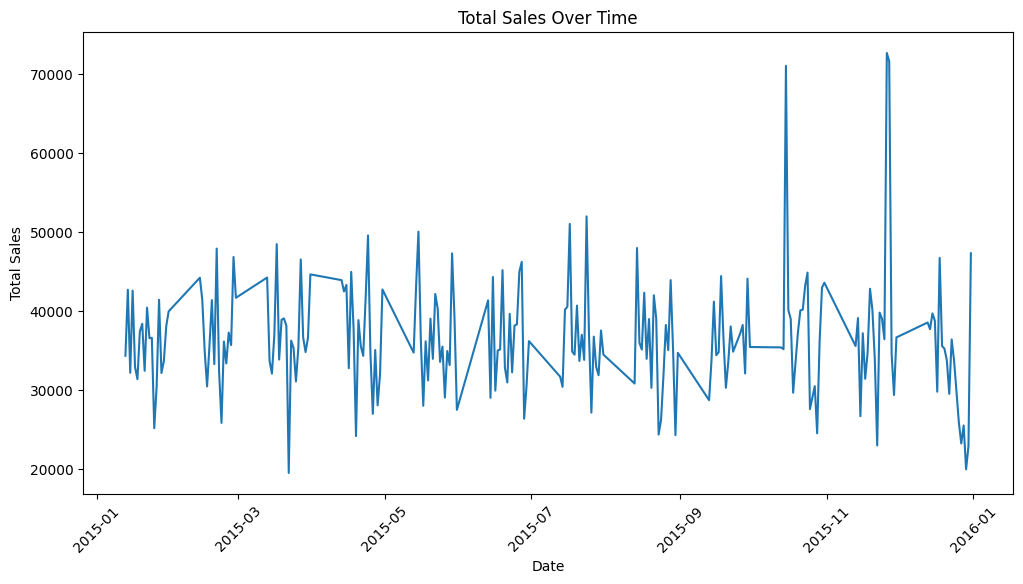

In [55]:
sales_overtime=merged_df.groupby('order_date')['total_price'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=sales_overtime,x='order_date',y='total_price')
plt.title("Total Sales Over Time")
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

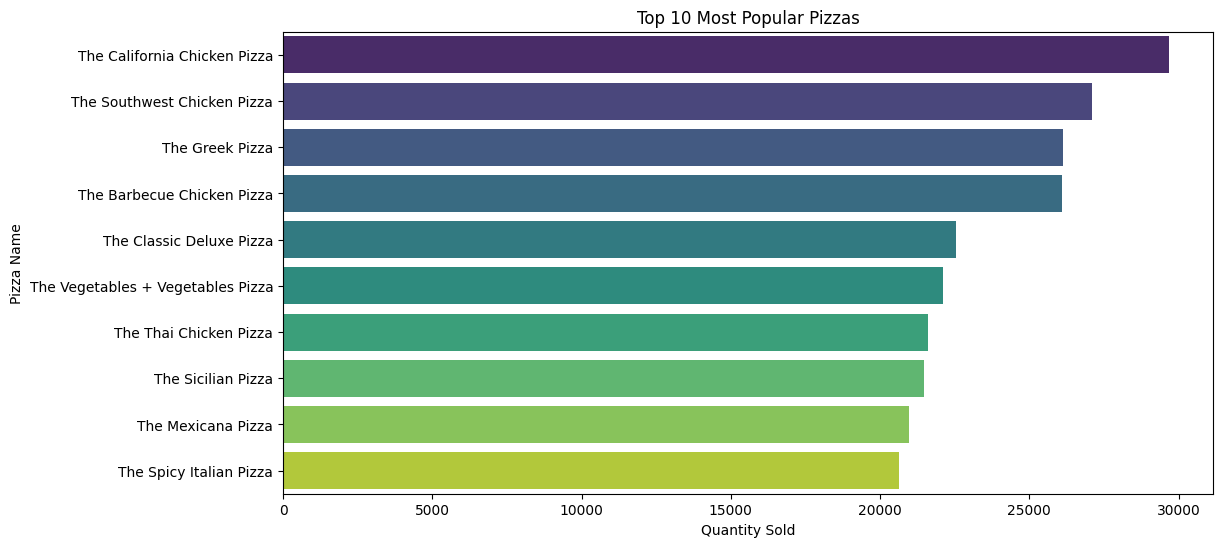

In [56]:
# Aggregate sales by pizza name
pizza_sales = merged_df.groupby('pizza_name')['quantity'].sum().reset_index()

# Sorting by quantity sold
pizza_sales = pizza_sales.sort_values(by='quantity', ascending=False)

# Ploting top 10 most popular pizzas
plt.figure(figsize=(12,6))
sns.barplot(data=pizza_sales.head(10), x='quantity', y='pizza_name', palette='viridis')
plt.title('Top 10 Most Popular Pizzas')
plt.xlabel('Quantity Sold')
plt.ylabel('Pizza Name')
plt.show()

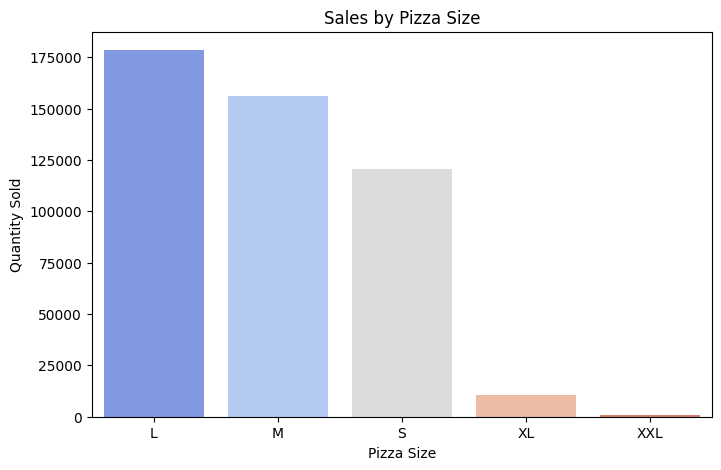

In [57]:
# Ploting pizza size distribution
size_sales = merged_df.groupby('pizza_size')['quantity'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=size_sales, x='pizza_size', y='quantity', palette='coolwarm')
plt.title('Sales by Pizza Size')
plt.xlabel('Pizza Size')
plt.ylabel('Quantity Sold')
plt.show()

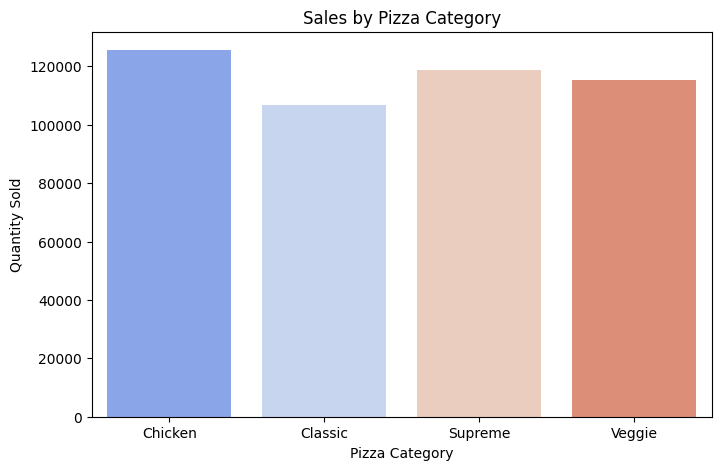

In [58]:
# Ploting pizza category distribution
category_sales = merged_df.groupby('pizza_category')['quantity'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=category_sales, x='pizza_category', y='quantity', palette='coolwarm')
plt.title('Sales by Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Quantity Sold')
plt.show()

In [59]:
ingredient_usage = merged_df.groupby(['pizza_name', 'pizza_ingredients'])['Items_Qty_In_Grams'].sum().reset_index()
ingredient_usage

,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,The Barbecue Chicken Pizza,Barbecue Sauce,42330.0
1,The Barbecue Chicken Pizza,Barbecued Chicken,126990.0
2,The Barbecue Chicken Pizza,Green Peppers,77605.0
3,The Barbecue Chicken Pizza,Red Onions,169320.0
4,The Barbecue Chicken Pizza,Red Peppers,42330.0
...,...,...,...
174,The Vegetables + Vegetables Pizza,Red Onions,109320.0
175,The Vegetables + Vegetables Pizza,Red Peppers,27330.0
176,The Vegetables + Vegetables Pizza,Spinach,81990.0
177,The Vegetables + Vegetables Pizza,Tomatoes,54660.0


In [60]:
total_ingredient_usage = merged_df.groupby('pizza_ingredients')['Items_Qty_In_Grams'].sum().reset_index()

In [61]:
sales_df['order_date'] = pd.to_datetime(sales_df['order_date'])
daily_sales = sales_df.groupby('order_date')['total_price'].sum().reset_index()

**Predicting model**

In [62]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(daily_sales['total_price'], 
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 7))
results = model.fit()
forecast = results.get_forecast(steps=30)

future_sales = forecast.predicted_mean

In [63]:
from sklearn.metrics import mean_absolute_percentage_error

y_true = daily_sales['total_price'][-30:]
y_pred = forecast.predicted_mean

mape = mean_absolute_percentage_error(y_true, y_pred)
print(f'MAPE: {mape:.2f}')


MAPE: 0.21


In [64]:
future_sales = forecast.predicted_mean

In [65]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
def model(df, pizza_name):
    model = SARIMAX(df[pizza_name], 
                    order=(1, 1, 1),
                    seasonal_order=(1, 1, 1, 7))
    results = model.fit()
    forecast = results.get_forecast(steps=30)
    future_sales = forecast.predicted_mean
    return future_sales

In [66]:
# Pivot table to get pizza names as columns and order_date as index
pivot_table_pizzaname = sales_df.pivot_table(index='order_date', columns='pizza_name', values='quantity', aggfunc='sum', fill_value=0)
pivot_table_pizzaname = pivot_table_pizzaname.reset_index()

In [67]:
pizza_names = list(sales_df['pizza_name'].unique())

In [68]:
pizza_name_forecaset_dict = {}
for pizza_name in pizza_names:
    forescast = model(pivot_table_pizzaname, pizza_name)
    forescast = pd.DataFrame(forescast)
    forescast = list(forescast['predicted_mean'])
    pizza_name_forecaset_dict[pizza_name] = forescast

In [69]:
ingredients_df

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0
...,...,...,...,...
513,veggie_veg_s,The Vegetables + Vegetables Pizza,Green Peppers,20.0
514,veggie_veg_s,The Vegetables + Vegetables Pizza,Red Onions,20.0
515,veggie_veg_s,The Vegetables + Vegetables Pizza,Zucchini,10.0
516,veggie_veg_s,The Vegetables + Vegetables Pizza,Spinach,15.0


In [70]:
# Pivot table to get pizza names as columns and order_date as index
pivot_table_ingredients = ingredients_df.pivot_table(index='pizza_name', columns='pizza_ingredients', values='Items_Qty_In_Grams', aggfunc='sum', fill_value=0)


In [71]:
ingredients = list(pivot_table_ingredients.columns)

In [72]:
list(pivot_table_ingredients.index)

['The Barbecue Chicken Pizza',
 'The Big Meat Pizza',
 'The Brie Carre Pizza',
 'The Calabrese Pizza',
 'The California Chicken Pizza',
 'The Chicken Alfredo Pizza',
 'The Chicken Pesto Pizza',
 'The Classic Deluxe Pizza',
 'The Five Cheese Pizza',
 'The Four Cheese Pizza',
 'The Greek Pizza',
 'The Green Garden Pizza',
 'The Hawaiian Pizza',
 'The Italian Capocollo Pizza',
 'The Italian Supreme Pizza',
 'The Italian Vegetables Pizza',
 'The Mediterranean Pizza',
 'The Mexicana Pizza',
 'The Napolitana Pizza',
 'The Pepper Salami Pizza',
 'The Pepperoni Pizza',
 'The Pepperoni, Mushroom, and Peppers Pizza',
 'The Prosciutto and Arugula Pizza',
 'The Sicilian Pizza',
 'The Soppressata Pizza',
 'The Southwest Chicken Pizza',
 'The Spicy Italian Pizza',
 'The Spinach Pesto Pizza',
 'The Spinach Supreme Pizza',
 'The Spinach and Feta Pizza',
 'The Thai Chicken Pizza',
 'The Vegetables + Vegetables Pizza']